### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 
Work in a group whom you did not worked before and submit the work before Next class
- Rename the notebook Practice_ClassNB_Pandas_XX (your initial)
- Indivijual submission 

#### Import pandas, numpy

In [32]:
import numpy as np
import pandas as pd

### 1. Load the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [33]:
#cm=complaints
cm=pd.read_csv('311-service-requests.csv',dtype='unicode')

In [34]:
cm

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"


### 2. What's even in it? (the summary)


#### This data seems to have been made to track what kind of complaints police stations are getting. This set could possibly just be for record keeping, but that doesn't mean that we can't get interesting information out of it.

### spaces in column names are replaced with ‘_’
complaints.columns =[column.replace(" ", "_") 
                     for column in complaints.columns]

In [35]:
cm.columns=[c.replace(" ","_")for c in cm.columns]

In [36]:
cm.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

### 3. Which month and year the complains received?


In [37]:
cm['Created_Date']=pd.to_datetime(cm['Created_Date'])

In [38]:
cm['Month_Received']=cm['Created_Date'].dt.month

In [39]:
cm['Year_Received']=cm['Created_Date'].dt.year

In [40]:
cm

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location,Month_Received,Year_Received
0,26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)",10,2013
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)",10,2013
2,26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)",10,2013
3,26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)",10,2013
4,26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)",10,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,2013-10-04 00:01:13,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2013
111065,26428083,2013-10-04 00:01:05,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)",10,2013
111066,26428987,2013-10-04 00:00:45,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)",10,2013
111067,26426115,2013-10-04 00:00:28,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)",10,2013


### 4. Drop the columns which you are not going to use for any analysis/ not bringing any meaningful informations/ most of the entries are null (Find out 5 and explain why you selected that)

In [41]:
cm.drop(['Unique_Key','Agency','Incident_Address','Road_Ramp','Bridge_Highway_Segment','Garage_Lot_Name','Ferry_Direction','Ferry_Terminal_Name','Latitude','Longitude','Location'], axis=1, inplace=True)

In [42]:
cm.drop(['Street_Name','Cross_Street_1','Cross_Street_2','School_Zip','School_Not_Found','School_or_Citywide_Complaint','Taxi_Pick_Up_Location','Bridge_Highway_Name','Bridge_Highway_Direction'],axis=1,inplace=True)

In [43]:
cm.drop(['Created_Date','Intersection_Street_1','Intersection_Street_2','Address_Type','School_Region','School_Code','School_Phone_Number','School_Address','School_City','School_State','Vehicle_Type',],axis=1,inplace=True)

In [44]:
cm.drop(['City','Landmark','Descriptor','Incident_Zip','X_Coordinate_(State_Plane)','Park_Facility_Name','Park_Borough','School_Name','School_Number'],axis=1,inplace=True)

In [45]:
cm.drop(['Status','Due_Date','Resolution_Action_Updated_Date','Community_Board','Y_Coordinate_(State_Plane)','Taxi_Company_Borough'],axis=1,inplace=True)

In [46]:
cm.drop(['Closed_Date','Month_Received','Year_Received'],axis=1,inplace=True)

In [47]:
cm

,Agency_Name,Complaint_Type,Location_Type,Facility_Type,Borough
0,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,Precinct,QUEENS
1,New York City Police Department,Illegal Parking,Street/Sidewalk,Precinct,QUEENS
2,New York City Police Department,Noise - Commercial,Club/Bar/Restaurant,Precinct,MANHATTAN
3,New York City Police Department,Noise - Vehicle,Street/Sidewalk,Precinct,MANHATTAN
4,Department of Health and Mental Hygiene,Rodent,Vacant Lot,NaN,MANHATTAN
...,...,...,...,...,...
111064,Department of Parks and Recreation,Maintenance or Facility,Park,NaN,BROOKLYN
111065,New York City Police Department,Illegal Parking,Street/Sidewalk,Precinct,QUEENS
111066,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,Precinct,MANHATTAN
111067,New York City Police Department,Noise - Commercial,Club/Bar/Restaurant,Precinct,BROOKLYN


### 5. Is there any missing value in the dataset? Display the list.
Impute the missing values in Street_Name, Address_Type, and City 

In [22]:
cm.isnull().sum()

Agency_Name           0
Complaint_Type        0
Location_Type     32047
Incident_Zip      12262
Facility_Type     91965
dtype: int64

In [23]:
cm.fillna('Unknown',inplace=True)

In [24]:
cm

,Agency_Name,Complaint_Type,Location_Type,Incident_Zip,Facility_Type
0,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,11432,Precinct
1,New York City Police Department,Illegal Parking,Street/Sidewalk,11378,Precinct
2,New York City Police Department,Noise - Commercial,Club/Bar/Restaurant,10032,Precinct
3,New York City Police Department,Noise - Vehicle,Street/Sidewalk,10023,Precinct
4,Department of Health and Mental Hygiene,Rodent,Vacant Lot,10027,Unknown
...,...,...,...,...,...
111064,Department of Parks and Recreation,Maintenance or Facility,Park,11213,Unknown
111065,New York City Police Department,Illegal Parking,Street/Sidewalk,11434,Precinct
111066,New York City Police Department,Noise - Street/Sidewalk,Street/Sidewalk,10016,Precinct
111067,New York City Police Department,Noise - Commercial,Club/Bar/Restaurant,11226,Precinct


### 6. What are the top 5 `complains` received? Show the result graphically using bar plot.

In [26]:
cm['Complaint_Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint_Type, Length: 165, dtype: int64

<Axes: >

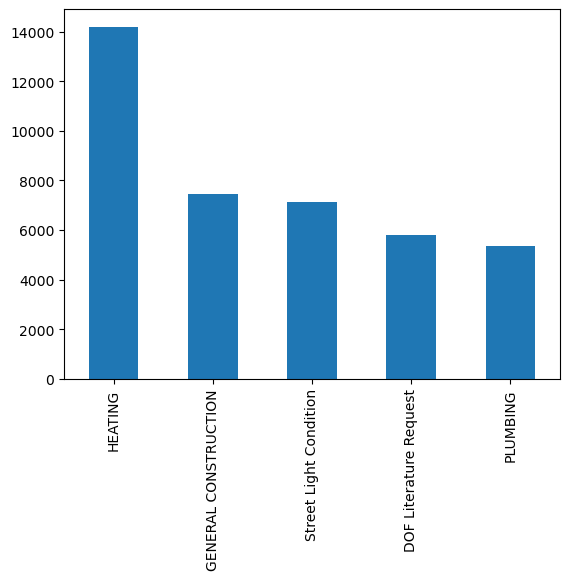

In [31]:
cm['Complaint_Type'].value_counts().head(5).plot(kind="bar")

### 7. What's the most common `Borough` the complain came? Display top 5 most and plot them out

BROOKLYN       32890
MANHATTAN      24288
QUEENS         22281
BRONX          19686
Unspecified     7107
Name: Borough, dtype: int64


<Axes: >

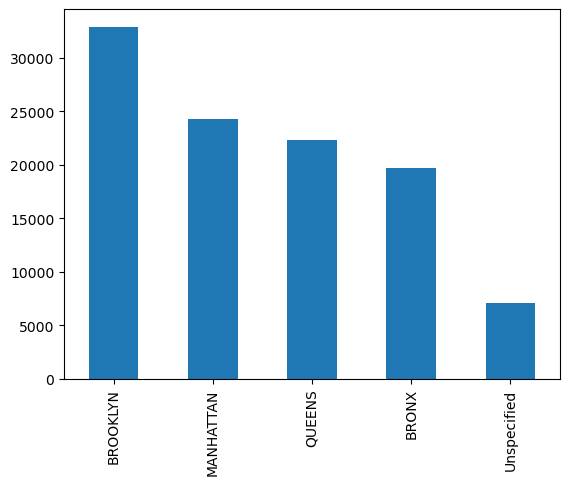

In [49]:
top5=cm["Borough"].value_counts().head(5)
print(top5)
top5.plot(kind="bar")

### 8. Which agency received the most complain and which one least?

In [56]:
most=cm["Agency_Name"].value_counts().head(1)
least=cm["Agency_Name"].value_counts().tail(1)
print(most)
print(least)

Department of Housing Preservation and Development    39067
Name: Agency_Name, dtype: int64
School - Grace Dodge Career and Technical Education High School    1
Name: Agency_Name, dtype: int64


## 9. Investigate the data set and look for meaningful information for two more questions (Indivijual/ discuss with partner)
We will discuss the new findings in Tueaday's class

In [57]:
cm["Location_Type"].value_counts()

RESIDENTIAL BUILDING         39067
Street/Sidewalk              12036
Street                       11569
Sidewalk                      5220
Club/Bar/Restaurant           1865
                             ...  
School - K-12 Public             1
Pier                             1
Office Building                  1
Steam Room                       1
Cafeteria - Public School        1
Name: Location_Type, Length: 90, dtype: int64

### 10. Select illegal Parking complains at Queens Borough and save it to new_complaint. How many entries are there?
You can use `query`/iloc

In [79]:
cm=pd.read_csv('311-service-requests.csv',dtype='unicode')
cm.columns=[c.replace(" ","_")for c in cm.columns]

In [80]:
new_complaint=cm.query('Complaint_Type=="Illegal Parking" & Borough=="QUEENS"')

In [81]:
new_complaint.shape

(887, 52)

### 11. Filter 3 columns `Complaint_Type, Created_Date,Descriptor` from the new_complaint and save it as a CSV file named **Complains at Queens**.

In [82]:
new_complaint.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

In [86]:
new_complaint.head(5)

,Created_Date,Complaint_Type,Descriptor
1,10/31/2013 02:01:04 AM,Illegal Parking,Commercial Overnight Parking
116,10/30/2013 11:20:57 PM,Illegal Parking,Blocked Hydrant
117,10/30/2013 11:20:26 PM,Illegal Parking,Posted Parking Sign Violation
140,10/30/2013 11:01:49 PM,Illegal Parking,Commercial Overnight Parking
186,10/30/2013 10:33:28 PM,Illegal Parking,Commercial Overnight Parking


In [87]:
new_complaint.to_csv("Complaints at Queens", index=False)

### 12. Load it back to verify the data

In [90]:
pd.read_csv("Complaints at Queens")

,Created_Date,Complaint_Type,Descriptor
0,10/31/2013 02:01:04 AM,Illegal Parking,Commercial Overnight Parking
1,10/30/2013 11:20:57 PM,Illegal Parking,Blocked Hydrant
2,10/30/2013 11:20:26 PM,Illegal Parking,Posted Parking Sign Violation
3,10/30/2013 11:01:49 PM,Illegal Parking,Commercial Overnight Parking
4,10/30/2013 10:33:28 PM,Illegal Parking,Commercial Overnight Parking
...,...,...,...
882,10/04/2013 01:32:20 AM,Illegal Parking,Commercial Overnight Parking
883,10/04/2013 01:08:14 AM,Illegal Parking,Overnight Commercial Storage
884,10/04/2013 12:28:01 AM,Illegal Parking,Commercial Overnight Parking
885,10/04/2013 12:13:08 AM,Illegal Parking,Posted Parking Sign Violation
